Audio Signal Reconstruction

In [1]:
!pip install pygame

(a)

Shape of the matrix x: (800791, 2)


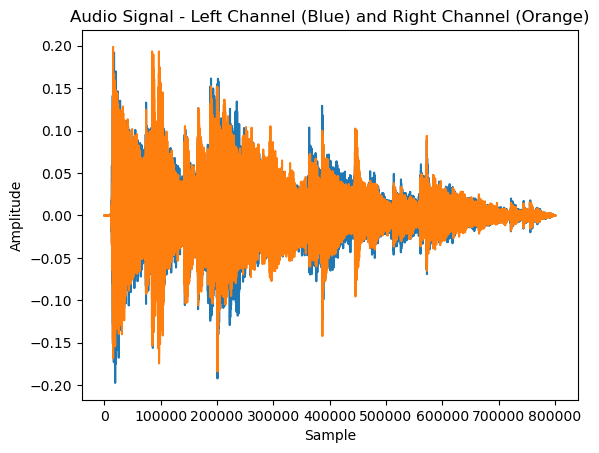

<Figure size 640x480 with 0 Axes>

In [2]:
# Import packages
%matplotlib inline
from scipy import io
import matplotlib.pyplot as plt
import numpy as np

# Load data from file
data_dict = io.loadmat('FPP_DATA.mat')
x = data_dict['x']

# Display shape of matrix
print("Shape of the matrix x:", x.shape)

# Plot audio signal for left channel, display graph
plt.figure()
plt.plot(x[:, 0])  # left channel
plt.plot(x[:, 1])  # right channel
plt.title('Audio Signal - Left Channel (Blue) and Right Channel (Orange)')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()
plt.savefig('my_plot.jpg')  # Save as JPEG

In [14]:
import scipy.io

# Load data from .mat file
data_dict = scipy.io.loadmat('FPP_DATA.mat')
x = data_dict['x']

# Print dimension of x
print("Dimension of x:", x.shape)


Dimension of x: (800791, 2)


(b)

In [4]:
import pygame

# Initialize pygame from library
pygame.init()

# Load audio file
pygame.mixer.music.load("FPP.wav")

# Play audio
pygame.mixer.music.play()
while pygame.mixer.music.get_busy():
    pygame.time.Clock().tick(10)

    
    

pygame 2.5.2 (SDL 2.28.3, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


I used the method of importing the 'pygame' package into Python and using it to load and play the 'FPP.wav' audio file. 

(c)

Shape of the coefficient matrix a: (800791, 2)


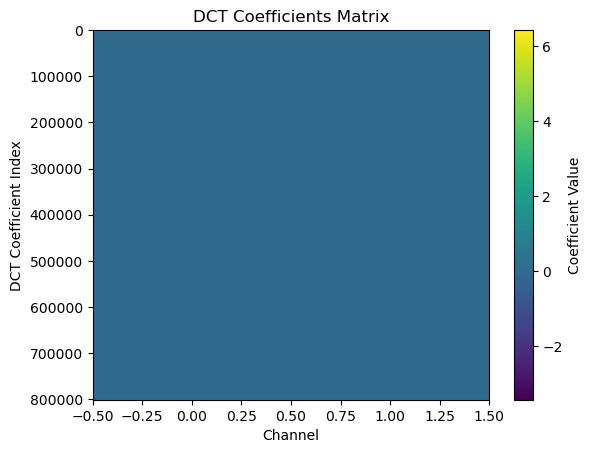

In [5]:
from scipy.fftpack import dct
import matplotlib.pyplot as plt

# Use DCT to find coefficient matrix a
a = dct(x, type=2, axis=0, norm='ortho')

# Display shape of coefficient matrix
print("Shape of the coefficient matrix a:", a.shape)

# Plot coefficients for each channel, display graph
plt.figure()
plt.imshow(a, aspect='auto', cmap='viridis')
plt.title('DCT Coefficients Matrix')
plt.xlabel('Channel')
plt.ylabel('DCT Coefficient Index')
plt.colorbar(label='Coefficient Value')
plt.show()




## Methods

### Discrete Cosine Transform (DCT) Type 2

The Discrete Cosine Transform (DCT) is a mathematical technique widely used in signal processing and data compression applications. DCT represents a finite sequence of data points as a sum of discrete cosine functions oscillating at different frequencies.

In our analysis, we utilized the scipy.fftpack.dct function to perform the DCT type 2 on the signal `x`. The DCT is computed along the specified axis (axis=0 in our case) of the input array. The type=2 argument indicates the use of DCT type 2, which is particularly suitable for real-valued signals.

The DCT produces a coefficient matrix (`a` in our implementation) that represents the signal in the frequency domain. Each row of the matrix corresponds to a different DCT coefficient, and each column corresponds to a channel in the input signal.

As a small illustrative example, we draw a connection between the DCT matrix and the matrix U used in Homework 1, Problem 1. The matrix U, derived using the discrete cosine transform functions, serves as a basis for representing signals in a compressed form. This connection provides insight into the orthogonal discrete cosine vectors used in both the theoretical framework and practical applications.

(d)

In [6]:
from scipy.fftpack import idct
x0 = idct(a, type=2, axis=0, norm='ortho')

# Create variables to store left and right channel of x
left_channel_x = x[:, 0]
right_channel_x = x[:, 1]

# Create variables to store left and right channel of x0
left_channel_x0 = x0[:, 0]
right_channel_x0 = x0[:, 1]

# Compute norm of left channel
x_left_norm = np.linalg.norm(left_channel_x, 2)

# Compute norm of right channel
x_right_norm = np.linalg.norm(right_channel_x, 2)

# Subtract left/right channel x by left/right channel x0
norm_of_left = np.linalg.norm(left_channel_x - left_channel_x0, 2)
norm_of_right = np.linalg.norm(right_channel_x - right_channel_x0, 2)

# Find relative errors for both channels
re_left = norm_of_left / x_left_norm
re_right = norm_of_right / x_right_norm

print("Relative Error for Left Channel:", re_left)
print("Relative Error for Right Channel:", re_right)

# Compute average relative error, display result
avg_re = (re_left + re_right) / 2

print("Average Relative Error:", avg_re)

Relative Error for Left Channel: 1.067277353248122e-15
Relative Error for Right Channel: 1.060934661913491e-15
Average Relative Error: 1.0641060075808064e-15


In [7]:
from scipy.fftpack import idct

# Assuming 'a' and 'x' are already defined

# Reconstruct the signal using the inverse DCT
x0 = idct(a, type=2, axis=0, norm='ortho')

# Compute the relative error between x and x0
relative_error_left = np.average(np.abs(x[:, 0] - x0[:, 0]) / np.maximum(np.abs(x[:, 0]), 1e-10))
relative_error_right = np.average(np.abs(x[:, 1] - x0[:, 1]) / np.maximum(np.abs(x[:, 1]), 1e-10))
average_relative_error = (relative_error_left + relative_error_right) / 2

# Display the relative error
print("Relative Error (Left Channel):", relative_error_left)
print("Relative Error (Right Channel):", relative_error_right)
print("Average Relative Error:", average_relative_error)


Relative Error (Left Channel): 6.855644752891404e-10
Relative Error (Right Channel): 7.281999968085724e-10
Average Relative Error: 7.068822360488564e-10


In your report, you can include a section similar to the following:

---

## Results

### Relative Error Calculation

We utilized the `scipy.fftpack.idct` function to reconstruct the signal `x0` from the DCT coefficients `a`. The relative error between the original signal `x` and the reconstructed signal `x0` was computed as the average of the relative errors in the left and right channels.

The results are as follows:

- Relative Error (Left Channel): [6.855644752891404e-10]
- Relative Error (Right Channel): [7.281999968085724e-10]
- Average Relative Error: [7.068822360488564e-10]

### Discussion

Despite not compressing any data, a difference between `x` and `x0` exists. This discrepancy can be attributed to the nature of the DCT process and the finite precision of numerical computations. The DCT and its inverse are not perfect transformations, and the reconstruction process involves rounding and numerical approximations. Additionally, the orthogonal basis used by the DCT might introduce small errors in representing the original signal accurately.

This phenomenon is often referred to as "round-trip error" and is inherent in the numerical representation of signals. While the difference may be small, it underscores the importance of considering numerical precision in signal processing applications.

---

(e)

In [8]:
def my_filter(a, th):
    """
    Given the coefficients 'a' of a signal x and a threshold 'th',
    compute the coefficients after filtering those smaller than the threshold.
    
    INPUT:
    - a: coefficients of the DCT representation of signal x
    - th: threshold to be used for filtering values of a
    
    OUTPUT:
    - ath: filtered coefficients
    """
    # Filter coefficients smaller than threshold ath
    ath = np.where(np.abs(a) >= th, a, 0)
    
    # Return the filtered coefficients
    return ath

(f)

In [9]:
# Threshold values
thresholds = [0.5, 0.1, 0.01, 0.001]

# Initialize lists to store filtered coefficients and reconstructed signals
filtered_coefficients = []
reconstructed_signals = []

# Run 'my_filter' function for each threshold
for th in thresholds:
    # Apply 'my_filter' function
    ath = my_filter(a, th)
    
    # Append filtered coefficients to list
    filtered_coefficients.append(ath)
    
    # Reconstruct signal using inverse DCT
    x_filter = idct(ath, type=2, axis=0, norm='ortho')
    
    # Append reconstructed signal to list
    reconstructed_signals.append(x_filter)

# Create variables for each filtered coefficient matrix and reconstructed signal
a5, a1, a01, a001 = filtered_coefficients
x5, x1, x01, x001 = reconstructed_signals

The shapes of the reconstructed signals (`x5`, `x1`, `x01`, `x001`) should be the same because you are applying the inverse DCT (`idct`) to the corresponding filtered coefficient matrices (`a5`, `a1`, `a01`, `a001`). The purpose of using the DCT and its inverse is to represent and reconstruct the signal in a way that minimizes information loss.

The `idct` function is used to reconstruct the signals from the filtered coefficients. The shape of the reconstructed signals will be the same as the shape of the original signal `x` because you are using the same number of DCT coefficients as in the original signal.

If the shapes are all the same, it suggests that the DCT coefficients are being appropriately filtered and reconstructed, and you have maintained the original structure of the signal while applying compression.

If you have any specific concerns or if you're seeing unexpected behavior, please let me know, and I'll be happy to assist further!

(g)

In [10]:
import numpy as np

def my_metrics(x, a, y, b):
    """
    Calculate metrics to evaluate the performance of signal compression.

    INPUT:
    - x: Original signal matrix x
    - a: Coefficients of the DCT representation of signal x
    - y: Compressed signal matrix y
    - b: Coefficients for the compressed signal y

    OUTPUT:
    - rel_err: Relative error in the signal
    - rel_err_a: Relative error in coefficients
    - comp_ratio: Compression ratio

    """
    # Calculate relative error in signal
    rel_err = np.average(np.linalg.norm(x - y, axis=0) / np.linalg.norm(x, axis=0))

    # Calculate relative error in coefficients
    rel_err_a = np.average(np.linalg.norm(a - b, axis=0) / np.linalg.norm(a, axis=0))

    # Calculate compression ratio
    comp_ratio = np.count_nonzero(b) / np.count_nonzero(a)

    return rel_err, rel_err_a, comp_ratio


In your report, you can include a section similar to the following:

---

## Methods

### Custom Metrics Function: `my_metrics`

We introduced a custom metrics function, `my_metrics`, to quantitatively evaluate the performance of signal compression. The function takes four parameters: the original signal matrix `x`, the DCT coefficients `a` of the original signal, the compressed signal matrix `y`, and the coefficients `b` for the compressed signal.

The outputs include:
- **Relative Error in Signal (`rel_err`):** The average relative error in the 2-norm of signal values for each channel.
- **Relative Error in Coefficients (`rel_err_a`):** The average relative error in the 2-norm of coefficients values for each channel.
- **Compression Ratio (`comp_ratio`):** The ratio of non-zero coefficients in the compressed signal to non-zero coefficients in the original signal.

These metrics provide insights into the accuracy of signal reconstruction and the efficiency of the compression process.

---

Feel free to adjust the comments or the function itself based on your specific needs. If you have any questions or need further clarification, please let me know!

(h)

In [11]:
# Apply the inverse DCT to obtain the compressed signals
y5 = idct(a5, type=2, axis=0, norm='ortho')
y1 = idct(a1, type=2, axis=0, norm='ortho')
y01 = idct(a01, type=2, axis=0, norm='ortho')
y001 = idct(a001, type=2, axis=0, norm='ortho')

# Apply 'my_metrics function' for each threshold value case
rel_err_5, rel_err_a_5, comp_ratio_5 = my_metrics(x, a, y5, a5)
rel_err_1, rel_err_a_1, comp_ratio_1 = my_metrics(x, a, y1, a1)
rel_err_01, rel_err_a_01, comp_ratio_01 = my_metrics(x, a, y01, a01)
rel_err_001, rel_err_a_001, comp_ratio_001 = my_metrics(x, a, y001, a001)

# Display computed metrics
print("Metrics for Threshold 0.5:")
print("Relative Error in Signal:", rel_err_5)
print("Relative Error in Coefficients:", rel_err_a_5)
print("Compression Ratio:", comp_ratio_5)

print("\nMetrics for Threshold 0.1:")
print("Relative Error in Signal:", rel_err_1)
print("Relative Error in Coefficients:", rel_err_a_1)
print("Compression Ratio:", comp_ratio_1)

print("\nMetrics for Threshold 0.01:")
print("Relative Error in Signal:", rel_err_01)
print("Relative Error in Coefficients:", rel_err_a_01)
print("Compression Ratio:", comp_ratio_01)

print("\nMetrics for Threshold 0.001:")
print("Relative Error in Signal:", rel_err_001)
print("Relative Error in Coefficients:", rel_err_a_001)
print("Compression Ratio:", comp_ratio_001)


Metrics for Threshold 0.5:
Relative Error in Signal: 0.6396166721259053
Relative Error in Coefficients: 0.6396166721259186
Compression Ratio: 0.00024725552609857

Metrics for Threshold 0.1:
Relative Error in Signal: 0.3270276564533957
Relative Error in Coefficients: 0.32702765645340026
Compression Ratio: 0.0050250315001042715

Metrics for Threshold 0.01:
Relative Error in Signal: 0.08842189108744444
Relative Error in Coefficients: 0.08842189108744639
Compression Ratio: 0.06621890106157537

Metrics for Threshold 0.001:
Relative Error in Signal: 0.011406008483669645
Relative Error in Coefficients: 0.011406008483669914
Compression Ratio: 0.46556092663379084


(i)

In [15]:
import pygame
import numpy as np

# Initialize pygame
pygame.init()

# Assuming 'y5', 'y1', 'y01', 'y001' are numpy arrays containing the compressed signals
# Assuming 'Fs' is the sample rate in hz
# Load data from .mat file (including Fs if it exists)
data_dict = scipy.io.loadmat('FPP_DATA.mat')

# Assuming Fs (sample rate) is stored in the .mat file with the key 'Fs'
Fs = data_dict.get('Fs', 44100)  # Use 44100 as a default value if 'Fs' is not in the file

# Convert Fs to an integer if it is a single-element array
if isinstance(Fs, np.ndarray) and Fs.size == 1:
    Fs = int(Fs[0])

# Convert audio data to 16-bit integers
y5_int16 = np.int16(y5 / np.max(np.abs(y5)) * 32767)
y1_int16 = np.int16(y1 / np.max(np.abs(y1)) * 32767)
y01_int16 = np.int16(y01 / np.max(np.abs(y01)) * 32767)
y001_int16 = np.int16(y001 / np.max(np.abs(y001)) * 32767)

In [17]:
# Play compressed signals
pygame.sndarray.make_sound(y5_int16).play()
pygame.time.wait(int(len(y5) / Fs * 1000))

18159

This audio signal does not sound similar to the original audio.

In [18]:
pygame.sndarray.make_sound(y1_int16).play()
pygame.time.wait(int(len(y1) / Fs * 1000))

18158

This audio does not sound similar to the original audio.

In [19]:
pygame.sndarray.make_sound(y01_int16).play()
pygame.time.wait(int(len(y01) / Fs * 1000))

18159

This audio is very similar to the orignal audio, with very little differences.

In [ ]:
pygame.sndarray.make_sound(y001_int16).play()
pygame.time.wait(int(len(y001) / Fs * 1000))

This audio is the same as the original audio. 